# Scikit-Learn

There are several Python libraries that provide implementations of a large number of machine learning algorithms. One of the more used ones is [Scikit-Learn](http://scikit-learn.org). It provides a clear, uniform and simple API, as well as complete documentation. Once the API is known, using different learning models and changing their hyperparameters becomes a very simple task.

## Representing data in Scikit-Learn

Scikit-Learn uses a tabular input format, similar to a Pandas DataFrame. In this format, each row represents an individual observation from the dataset, whereas columns represent properties of each population element. Let's employ the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to show what the library can do:

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Each data row encodes a particular flower, and the number of rows corresponds to the total number of flowers in the dataset. In general, we will refer to each row as a *sample*, and to the number of rows as ``n_samples``.

Similarly, each column in the table represents a quantitative property describing each sample. In general, we will refer to the columns as the *features*, and to the number of columns as ``n_features``.

#### Feature matrix

The tabular arrangement clearly shows that information can be encoded as a numerical 2-dimensional array (a matrix), with shape ``[n_samples,n_features]``, which we will name *feature matrix*. By convention, we will store the feature matrix in a variable named ``X``, which will be either a NumPy array or a Pandas ``DataFrame`` (although we will ocassionally use sparse matrices, e.g., using the SciPy-provided classes).

Generally speaking, features will have values in the set of the real numbers, although ocassionally they can be natural numbers or boolean values.

#### Label vector

Besides the feature matrix ``X``, we will work with a vector of *labels* or *targets*, which will be denoted ``y`` by convention, that we wish to predict from the data.
The label vector will usually be 1-dimensional, with ``n_samples`` elements, and will be stored into a NumPy array or a Pandas ``Series`` object.
The label vector can contain numerical data from the real numbers set or discrete labels.
Some of the estimators in Sciki-Learn may work with multiple labels/targets per sample, in which case we will use a 2-dimensional array of shape ``[n_samples,n_targets]``, although we will usually focus on the 1-dimensional case.

Let us use Seaborn to visualize the features of the Iris dataset using the species of each flower as an independent variable:

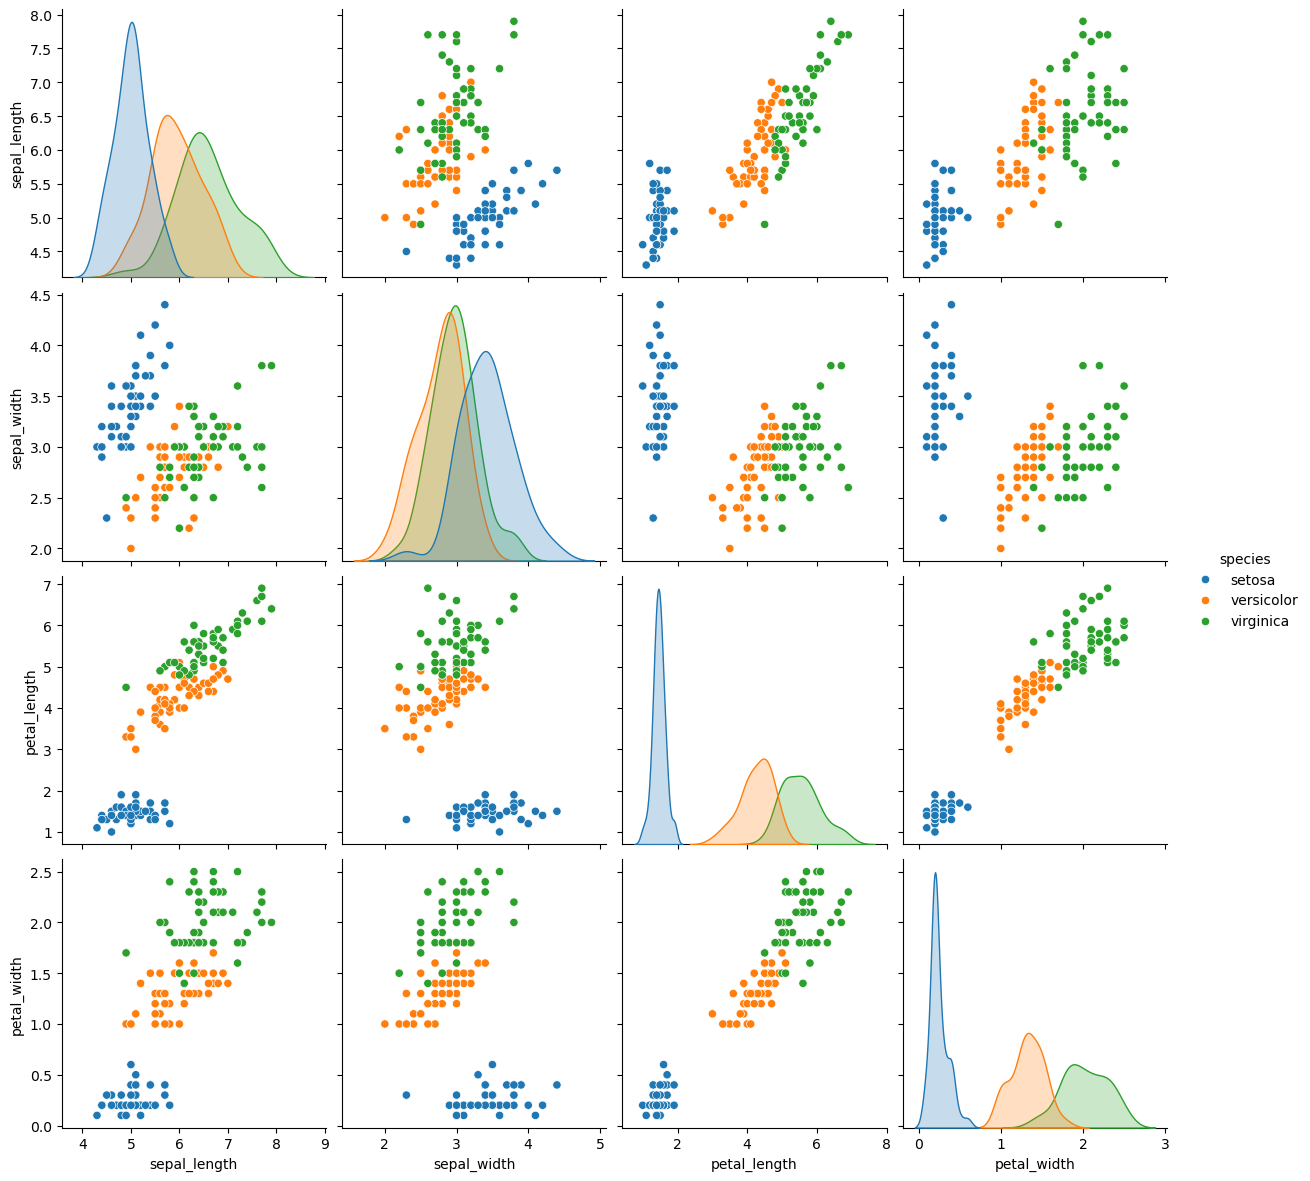

In [2]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=3)

We extract the feature matrix and the label vector from the Pandas ``DataFrame`` in which they are stored:

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

Next, we will introduce the *estimators* API in Scikit-Learn.

## Estimators in Scikit-Learn

The estimators API in Scikit-Learn was designed with the following principles in mind, as detailed in the [Scikit-Learn API](http://arxiv.org/abs/1309.0238) document:

- *Consistency*: All objects, basic or composite, share a consistent interface composed of a limited set of methods. This interface is documented in a consistent manner for all objects.

- *Inspection*: Constructor parameters and parameter values determined by learning algorithms are stored and exposed as public attributes.

- *Non-proliferation of classes*: Learning algorithms are the only objects to be represented using custom classes. Datasets are represented as NumPy arrays or SciPy sparse matrices.

- *Composition*: Many machine learning tasks are expressible as sequences or combinations of transformations to data. Some learning algorithms are also naturally viewed as meta-algorithms parameterized on other algorithms. Whenever feasible, such algorithms are implemented and composed from existing building blocks.

- *Sensible defaults*: Whenever an operation requires a user-defined parameter, an appropriate default value is defined by the library. The default value should cause the operation to be performed in a sensible way (giving a baseline solution for the task at hand).

These design principales make Scikit-Learn a very straightforward environment once its core mechanics are understood.
All the learning algorithms implemented in Scikit-Learn employ the estimators API, which provides a consistent interface to a wide range of machine learning techniques.

### Basic elements of the API

In most cases, the steps involved in using the estimators API in Scikit-Learn will be the following:

1. Choose a model and import the appropriate class from the Scikit-Learn module.
2. Choose the model hyperparameters to create an object of the chosen class with the desired values.
3. Build a feature matrix and a label vector from the data.
4. Fit the model to the data calling the ``fit()`` method of the created object.
5. Apply the model on new data:
   - In supervised learning, we usually wish to predict labels for a new dataset through ``predict()``.
   - In unsupervised learning, we will transform the dataset through ``transform()``, or infer properties from the data using ``predict()``.

In the following we cover several use cases of machine learning methods, both supervised and unsupervised.

### Supervised learning: simple linear regression

Let us consider the simple example of a linear regression. We will use the ``tips`` dataset covered in previous Notebooks.

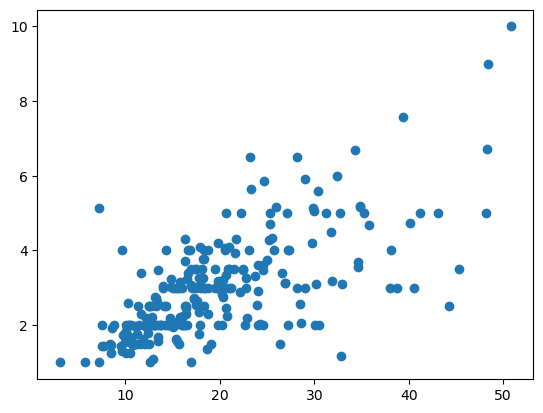

In [5]:
import matplotlib.pyplot as plt
tips = sns.load_dataset( "tips" )

plt.scatter(tips.total_bill, tips.tip);

Let us follow the steps proposed above to fit a linear regression model to these data:

#### 1. Choose a model

In Scikit-Learn, each model type is represented by a Python class.
For example, a linear regression is implemented by ``sklearn.linear_model.LinearRegression``:

In [6]:
from sklearn.linear_model import LinearRegression

There are other more complex regression models that we will cover later.

#### 2. Choose the model hyperparameters

There is an important difference between *the model* and the *instance* of the model that we create: the latter has particular values for the model hyperparameters.
In this example, let us create an instance of the linear regression model that fits both the slope and the intercept of the data. To this end we will use the ``fit_intercept`` hyperparameter:

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

The only action that has been taken during the creation of the instance model is to store the values of the hyperparameters in a new instance of the class. No fit has yet been performed.

#### 3. Build the feature matrix and the label vector from the data

In this case, we want to predict the value of tips from the total bill amount. We have to extract these from the ``DataFrame`` encoding all tip data. Furthermore, remember that the feature matrix must be 2-dimensional, regardless of whether there is a simple feature for each sample:

In [8]:
import numpy as np
X = tips.total_bill.values[:,np.newaxis] # We build a matrix (n_samples x 1) (instead of working with a vector)
y = tips.tip

(X.shape, y.shape)

((244, 1), (244,))

#### 4. Fit the model to the data

Now we can fit the selected model to our data using ``fit()``:

In [9]:
model.fit(X, y)

LinearRegression()

During the call to ``fit()`` all the necessary computations to fit the model to the data have taken place, and the results have been stored in model-dependent attributes inside the instance.
By convention, in Scikit-Learn all the names for model parameters that are computed during the call to ``fit()`` will include trailing underscores, e.g., in the linear regression case:

In [10]:
model.coef_

array([0.10502452])

In [11]:
model.intercept_

np.float64(0.9202696135546731)

These two parameters represent the slope and the intercept of the fitted model.

Generally speaking, Scikit-Learn does not provide tools to interpret the internal model parameters. This is a statistical modeling problem, not a machine learning one. There are other modules more focused on statistical modeling, such as [Statsmodels](http://statsmodels.sourceforge.net/).

#### 5. Applying the model to new data

Once the linear regression model has been fitted, its main use will be to predict the expected tip from a bill amount.
We can do this through ``predict()``.
As far as this example is concerned, our "new data" will be the range of values in which actual bills are included:

In [12]:
xfit = np.linspace(0, X.max())

As before, we need to transform this 1-dimensional array into a 2-dimensional matrix with shape ``[n_samples,n_features]``:

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Let us visualize the fitted model on top of the scatter plot of the original data:

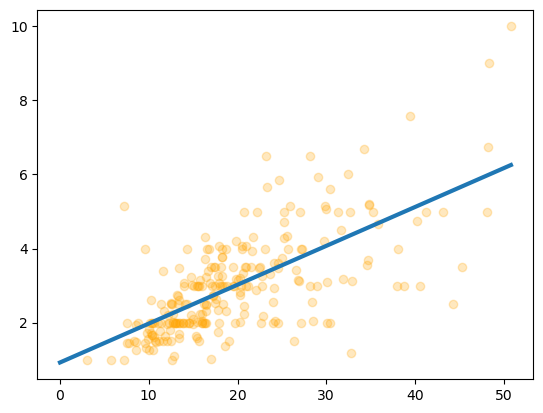

In [14]:
plt.scatter(X, y, color='orange', alpha=0.25)
plt.plot(xfit, yfit, linewidth=3);

We will often measure the efficacy of the model by comparing its results with a known baseline, as covered in the next example.

### Supervised learning: classification in the Iris dataset

Let us take a look at the classification of a set of samples using the Iris dataset that we covered at the beginning of this Notebook. We wish to answer the following question: given a model trained on a subset of the total dataset, can we reliably predict the labels?

For this task, we will employ a simple generative model known as Gaussian Naive Bayes classifier, which assumes that the data for each class come from a gaussian distribution.
Because of the fast fit and the absence of model hyperparameters, this is often a good model to test as a first classification approach before exploring other more sophisticated ones.

We would like to evaluate the model on data that have not been employed during the fit, so we will split the dataset in two: train and test. We could do this by hand, but Scikit-Learn provides a specialized function ``train_test_split()``:

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)
(Xtrain.shape,Xtest.shape)

((112, 4), (38, 4))

As can be seen, the 150 samples have been split into 112 for the train subset, and 38 for the test subset. We now fit the model:

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. model selection
model = GaussianNB()                       # 2. instantiation
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. prediction

Last, we check the efficacy of the model classification through the fraction of labels that can be correctly predicted using ``accuracy_score()``:

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

The obtained accuracy is above 97%.

#### Cross-validation

The validation using retention employed above, in which the dataset is divided into train and tests subsets, is highly sensitive to the way in which both sets are created. Scikit-Learn includes cross-validation mechanisms:

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score( model, X_iris, y_iris, cv=5 )

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

The ``cross_val_score`` model is a metamodel that accepts another already-hyperparameterized model, the dataset on which it must be applied, and the number of folds, and returns the obtained accuracies for each model trained on a fraction of the data and validated on the 

es un metamodelo que acepta otro modelo ya hiperparametrizado, el conjunto de datos sobre el que debe aplicarse, y el número de particiones deseadas para realizar la validación cruzada, y nos devuelve las precisiones obtenidas por dicho modelo entrenado sobre 4/5 de los datos y validado sobre la fracción restante.

Scikit-Learn implementa diferentes mecanismos de validación cruzada. Otro de ellos es ``LeaveOneOut``, un caso extremo en el que en cada partición todos los datos menos uno se emplean para el entrenamiento, y el restante para la validación:

In [19]:
from sklearn.model_selection import LeaveOneOut
cross_val_score( model, X_iris, y_iris, cv=LeaveOneOut() )

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Unsupervised learning: dimensionality reduction

Let us try to reduce the dimensionality of the Iris dataset so that it can be visualized in a simple way. Rememer that this dataset has four features for each sample:

In [20]:
X_iris.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In order to reduce the dimensionality we need to find a combination of a smaller feature number that retains the main particularities of the data.
Usually, dimensionality reduction is used as a previous step to visualization: it is much simpler to plot two features (2-dimensional data) than four.

We will use principal components analysis, an efficient method of linear dimensionality reduction.
We will ask the model to generate two features from the original four:

In [21]:
from sklearn.decomposition import PCA  # 1. model selection
model = PCA(n_components=2)            # 2. instantiation
model.fit(X_iris)                      # 3. model fit
X_2D = model.transform(X_iris)         # 4. transformation to 2 dimensions

Let us represent the results graphically. A simple way to plot the results is to insert them into the original ``DataFrame`` object and use Seaborn:

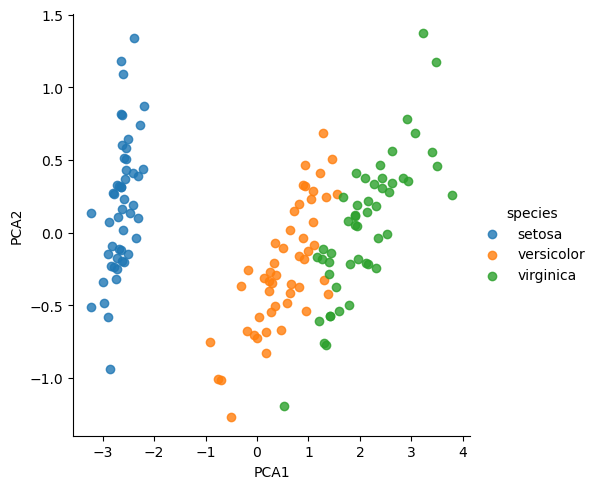

In [22]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

As can be seen, the original species have been separated quite effectively in this 2-dimensional plot, although we have used a fully unsupervised algorithm (i.e., it had no knowledge of the existence of different species in the data).

### Unsupervised learning: clustering

We will now study the application of clustering algorithms to the Iris dataset.
Clustering algorithms try to build homogeneous groups of samples without a previous classification of any type.
To this end, we will employ a gaussian mixture model, that we will fit as follows:

In [23]:
from sklearn.mixture import GaussianMixture # 1. model selection
model = GaussianMixture(n_components=3,
            covariance_type='full')         # 2. instantiation and hyper-parameterization
model.fit(X_iris)                           # 3. model fit
y_gmm = model.predict(X_iris)               # 4. label prediction

As in the previous example, we will add the results to the original ``DataFrame`` and show the results of the previous principal components analysis using Seaborn:

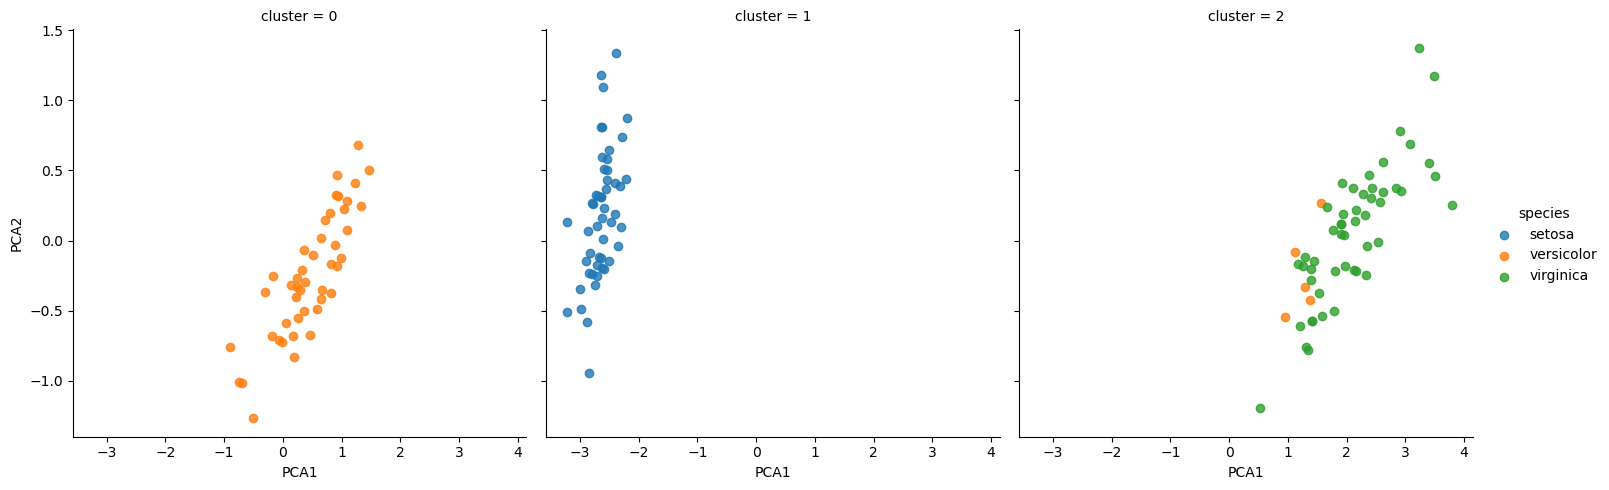

In [24]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

We can see how the *setosa* species have been perfectly classified, whereas some confusion remains regarding the *versicolor* and *virginica* species.
Even without an expert's intervention, the features of the samples are sufficiently distinctive so that the clustering algorithm *automatically* recognizes the existence of different species of flowers in this dataset.

## Example: handwritten digit recognition

Let us consider a part of the problem of automatic character recognition: identifying handwritten digits.
In the general case, solving this problem involves recognizing and identifying characters than may appear in any given image. In this example we will focus on recognizing a subset of the characters belonging to the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

### Loading and visualizing the digits

Scikit-Learn includes an automated method to download a subset of the samples:

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The downloaded dataset is known as [UCI ML](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), compiled by UC@Irvine and simplified. It consists of 1797 samples, each of which includes greyscale values for a 8x8 pixel matrix, representing a digit, as well as the associated label (which digit each bitmap represents).

We can plot these data to get a better idea of their shape:

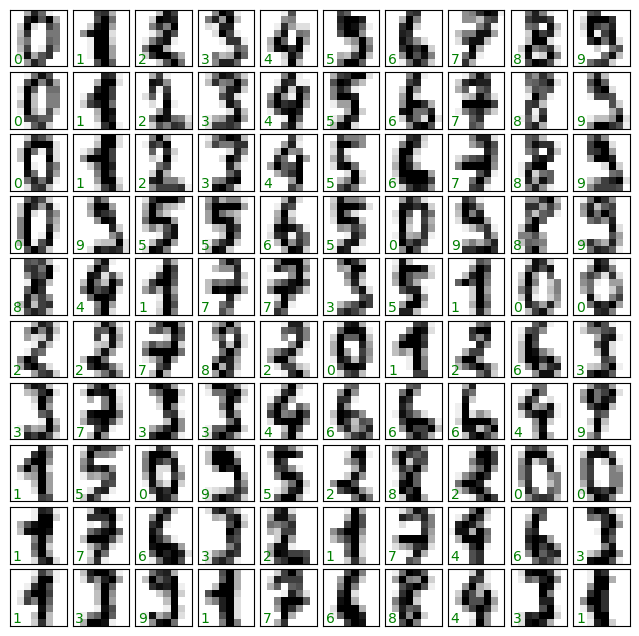

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Since Scikit-Learn accepts a 2-dimensional feature matrix, we are going to flatten the images to turn them into 1-dimensional vectors with 64 elements each. Actually, these data are readily available to us in the ``data`` attribute of the dataset:

In [27]:
X = digits.data
X.shape

(1797, 64)

We also need to extract the label vector, contained in the ``target`` attribute:

In [28]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: dimensionality reduction

We would like to visualized these data points in the 64-dimensional feature space. To do this, we will reduce the number of dimensions to 2, and visualize the results:

One possible approach is to employ principal component analysis again:

In [29]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_model.fit( X )
pca_projection = pca_model.transform(X)
pca_projection.shape

(1797, 2)

After which we can visualize the results:

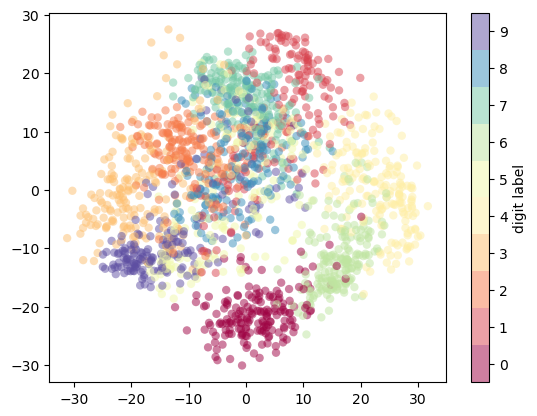

In [30]:
from matplotlib import colormaps as cm

plt.scatter(pca_projection[:, 0], pca_projection[:, 1], c=y,
            edgecolor='none', alpha=0.5,
            cmap=cm.get_cmap('Spectral').resampled(10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives an intuition of how separated are the different digits on the 64-dimensional space. E.g., "0"s and "1"s have very little in common.
Intuitively, this makes sense: "0"s are essentially empty towards the middle of the image, where "1"s are usually not.
On the other hand, it looks like there is a reasonably continuous range between "1"s and "4"s, and this is also intuitive given that many people draw "1"s with a small "hat".

Generally speaking, the principal components analysis has not been capable of effectively separating the different digits.

We now employ a more complex method that explores non-linear transformations of data: manifold learning:

In [31]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
iso_projection = iso.transform(X)
iso_projection.shape

/usr/lib/python3.13/site-packages/sklearn/manifold/_isomap.py:360: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/lib/python3.13/site-packages/scipy/sparse/_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

After the projection to two dimensions, we again build a scatterplot of the results:

/tmp/ipykernel_441074/2203195776.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


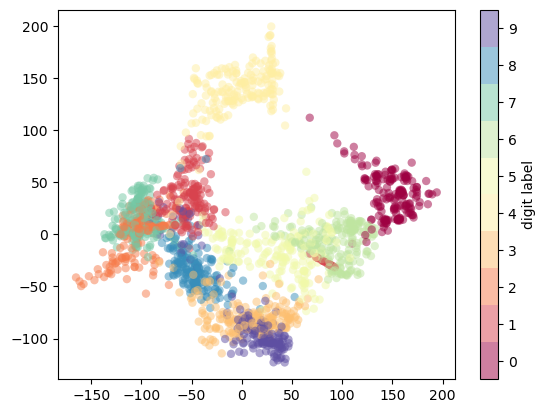

In [32]:
plt.scatter(iso_projection[:, 0], iso_projection[:, 1], c=y,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Although there still exists a certain confusion between many of the digits, now classes are more clearly separated, and overlaps are restricted to pairs or trios of similar digits.

### Digit classification

We now apply a supervised classification algorithm to the handwritten digits. Before that, we are going to split the dataset into train and test subsets, and fit a Gaussian Naive Bayes classifier:

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

We now check the accuracy of the model on the test subset:

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

i.e., even with this simple model the accuracy remains above 80%. In order to check *where* the model is wrongwe can generate the confusion matrix and plot it using Seaborn:

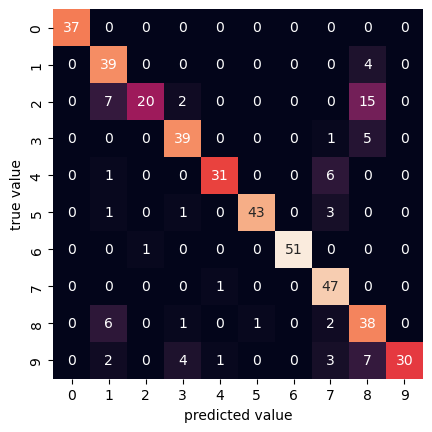

In [36]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This matrix shows where the incorrectly labeled points are. E.g., a large number of "2"s are classified as "1"s or "8"s.
Another approach to get information about the features in the model is to present the inputs together with the assigned labels:

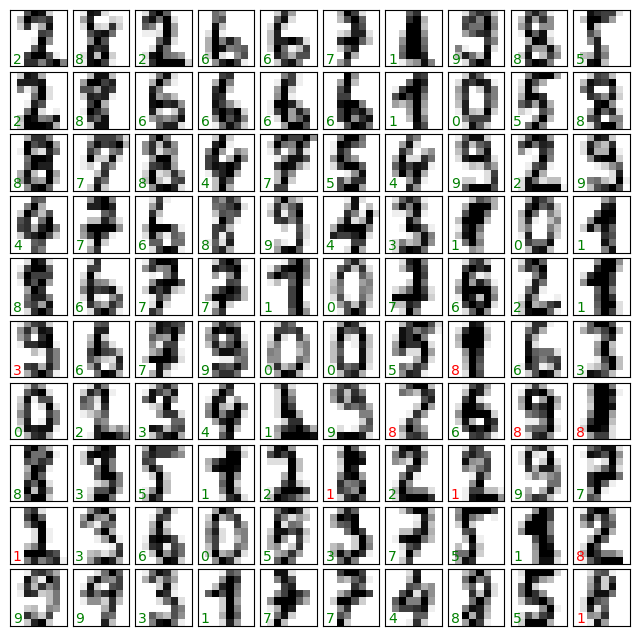

In [37]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

By analyzing this dataset, we can check first-hand which digits the algorithm is having trouble with.

In order to get better precision we must employ more sophisticated models, such as a random forest:

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



## Hyperparameter selection: validation curves and training

Selecting hyperparameters is sometimes far from trivial, and it is desirable to fit the same model multiple times with different hyperparameter values and check how the fit varies.
We are going to study this problem using a synthetic polynomial regression example:

<Axes: >

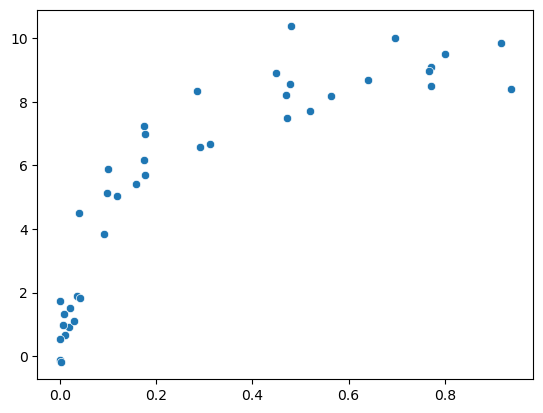

In [39]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
sns.scatterplot( x=X.ravel(), y=y )

Scikit-Learn provides a polynomial preprocessor that allows to adjust polynomial regressions using the linear regression model:

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

We can use ``PolynomialRegression`` to fit polynomial regressions with different degrees to our data:

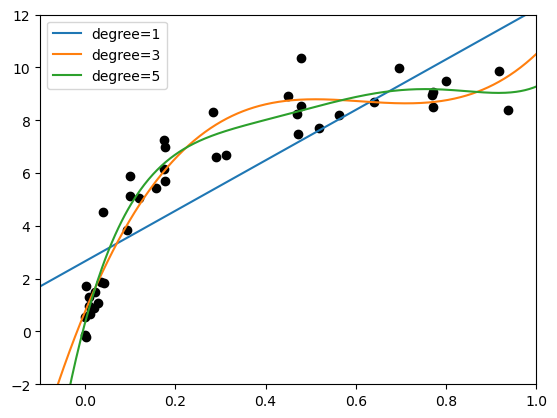

In [41]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In this case, the hyperparameter that we will try to fit is the degree of the polynomial regression. Which degree optimizes the fit, i.e., obtains the best compromise between overfitting and underfitting the model?

### Validation curves

We can study this effect by using the ``validation_curve`` class provided by Scikit-Learn:

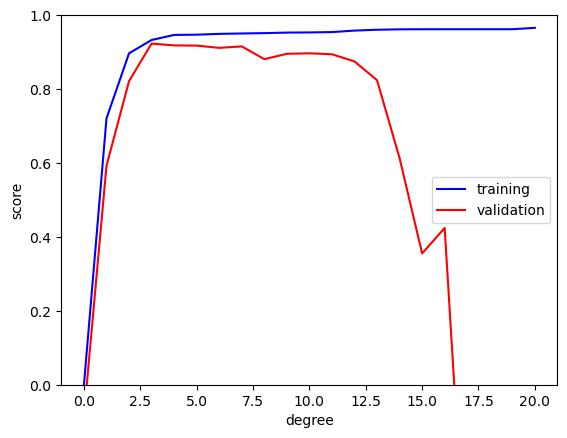

In [42]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

From this validation curve we can check that the polynomial regression with degree 3 is the one which best fits our data. We can compute the fit and plot it:

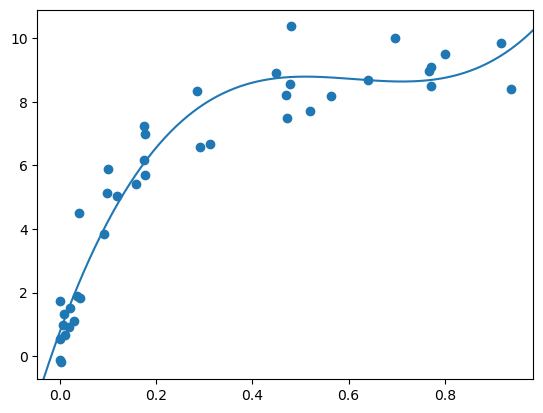

In [43]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Training curves

Another factor we must take into account is the size of the training set with respect to the testing set. Generally speaking, a model will overfit a training set which is too small, and will underfit a training set which is too large with respect to the problem complexity. Scikit-Learn provides a mechanism to compute the training curve for a model, so that we can relate the size of the training set to the obtained results:

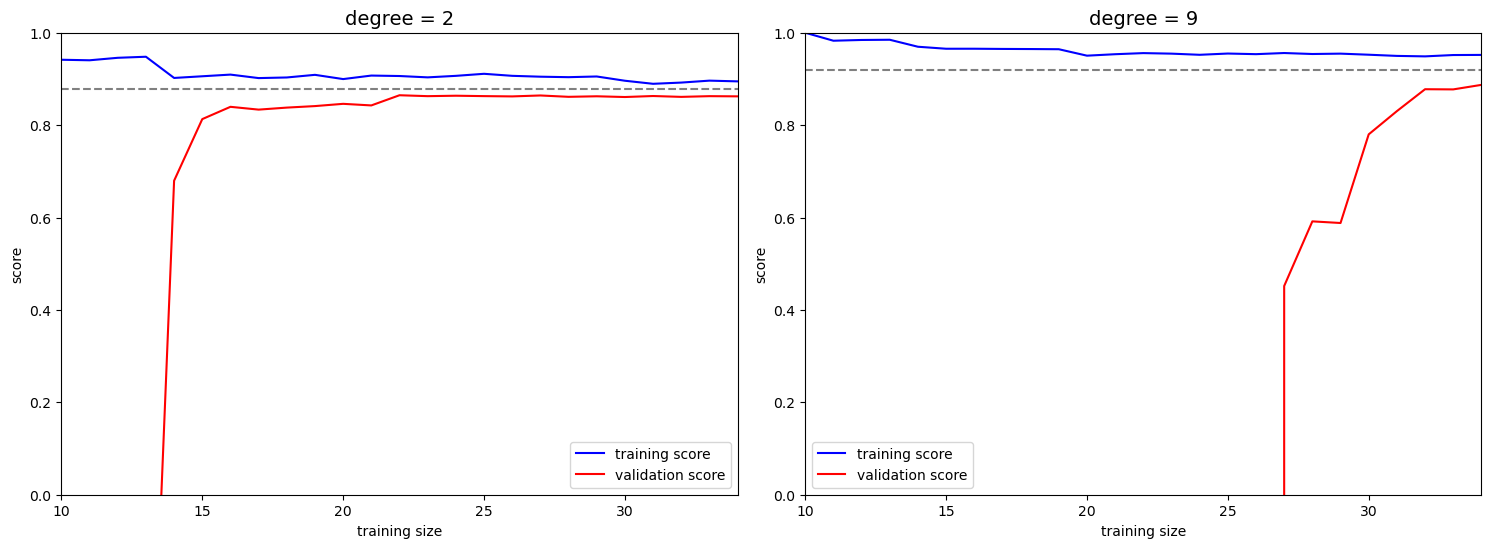

In [44]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

However, the previous code has plotted the training curves for two given polynomial degrees. Ideally, we should automate the optimization in all necessary dimensions: model hyperparameters, training set size, etc.

### Efficient validation: grid search

Scikit-Learn provides the ``GridSearchCV`` model to find the optimal model automatically. In this example we will explore a 3-dimensional search space: the degree of the polynomial regression, the fitting (or not) of the intercept, and whether or not to force the coefficients to be possitive.

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__positive': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__positive': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

Once the model has been fit, we can explore which parameters behave best as follows:

In [46]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__positive': False,
 'polynomialfeatures__degree': np.int64(4)}

Finally, we can fit the optimal model:

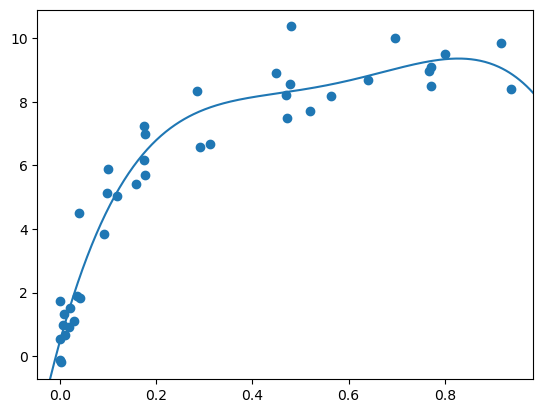

In [47]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

``GridSearchCV`` provides many features such as employing custom scoring functions, parallelizing the computation, performing random searches, etc. that we will not cover in these examples.

## Example: text classification

In previous examples we have employed the gaussian naive bayes classifier, but the gaussian distribution is not the only one that can be assumed when building a generative classifier.

Let us assume that we want to automatically identify the theme of a particular text. The dataset "20 newsgroups" contains approximately 20 000 documents belonging to newsgroups in several categories. We can load the dataset directly using a Scikit-Learn-provided function:

In [48]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

Let us explore ``data``:

In [49]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [50]:
data['data'][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [51]:
data['target'][0]

np.int64(7)

In [52]:
data['target_names'][data['target'][0]]

'rec.autos'

As we can see, the entry ``data['data'][i]`` contains the text of the $i-th$ post to the newsgroup, whereas the co-indexed entry ``data['target'][i]`` contains an integer identifying the particular newsgroup to which the text was posted. The names of these groups are stored in ``data['target_names']``.

Let us extract our feature matrix and label vector from these data, and then split the dataset into training and testing subsets:

In [53]:
X = data['data']
y = data['target']

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
(len(Xtrain), len(Xtest))

(8485, 2829)

Before building a classifier we need to perform "feature engineering" to transform the text strings into numerical data that can be handled by our machine learning classifier. We will employ TF-IDF (Text Frequency - Inverse Document Frequency) to this end:

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vec = TfidfVectorizer()
X_tfidf = vec.fit_transform(Xtrain)
X_tfidf.shape

(8485, 110364)

In [55]:
X_tfidf.shape

(8485, 110364)

We have built a ``X_tfidf`` array of shape ``[n_samples,n_words]``, where ``n_words`` is the number of different words appearing in the entire training set. If we want to find out which word has a higher frequency on the entire dataset:

In [56]:
X_tfidf.sum(axis=0).argmax()

np.int64(97081)

In [57]:
vec.get_feature_names_out()[97081]

'the'

Which is quite unsurprising.

It is important to highlight that the generated ``X_tfidf`` array is not a NumPy array, but a SciPy sparse matrix:

In [58]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1340439 stored elements and shape (8485, 110364)>

All Scikit-Learn models are compatible with SciPy sparse matrices. This allows to obtain high performance in the processing of datasets with high sparsity, such as the one we are currently working with.

Let us build a processing pipeline incorporating the TF-IDF analysis followed by a multinomial naive bayes classifier, which will be able to process the original dataset directly:

In [59]:
from sklearn.naive_bayes import MultinomialNB

model = make_pipeline( TfidfVectorizer(), MultinomialNB() )
model.fit( Xtrain, ytrain )
labels = model.predict( Xtest )

And we can evaluate the results:

In [60]:
accuracy_score( ytest, labels )

0.8278543655001768

Let us analyze the confusion matrix:

Text(113.92222222222219, 0.5, 'Predicted label')

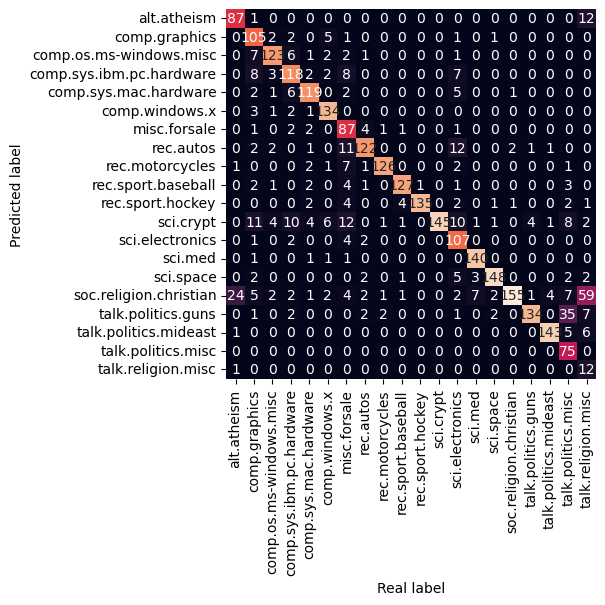

In [61]:
conf_mat = confusion_matrix( ytest, labels )
sns.heatmap( conf_mat.T, square=True, annot=True, fmt='d', cbar=False, 
             xticklabels=data['target_names'], yticklabels=data['target_names'] )
plt.xlabel( 'Real label' )
plt.ylabel( 'Predicted label' )

As can be seen, the classifier works reasonably well. The higher confusion sources stem from closely related groups, such as *alt.atheism*, *soc.religion.christian*, and *talk.religion.misc*.

## Example: facial recognition

Let us build a machine learning system capable of correctly identifying faces in the "Labeled Faces in the Wild" (LFW) dataset:

In [62]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


As can be seen, the dataset contains 1348 samples of size $62 \times 47$, each of which represents the face of a famous person in the above list. We can plot a subset of them:

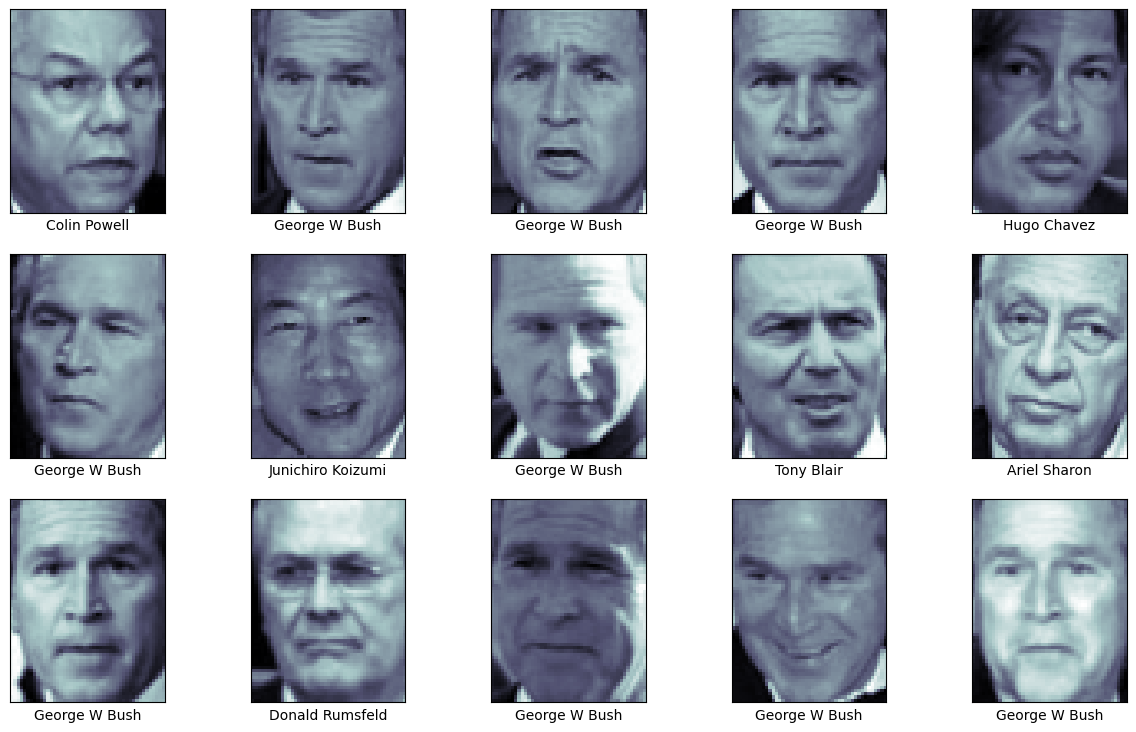

In [63]:
fig, ax = plt.subplots(3, 5, figsize=(15,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

We could proceed in the same way as in the handwritten digit recognition examples, considering $62 \times 47 = 2914$ features, but in order to achieve higher performance we will use PCA first in order to reduce problem complexity. Since we do not know how many features we should aim for, we start with a grid search in order to determine that.

We will use a support machine vector (SVM), a more sophisticated version of the classifiers and regression algorithms we have seen until now. We will add to our grid search the two fundamental parameters of the SVM: C and gamma.

In order to speed up the computation, we will paralelize the search:

In [64]:
from sklearn.svm import SVC

param_grid = {'pca__n_components': np.arange(50,1000,50),
              'svc__C': [1,5,10,50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

X,y = faces.data, faces.target

grid = GridSearchCV(make_pipeline(PCA(whiten=True,random_state=42),SVC(kernel='rbf',class_weight="balanced")),
                    param_grid, n_jobs=12, cv=5)
%time grid.fit(X,y)

CPU times: user 4.62 s, sys: 514 ms, total: 5.13 s
Wall time: 15min 48s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(random_state=42, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             n_jobs=12,
             param_grid={'pca__n_components': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950]),
                         'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

Once the grid search is over, we can check the results, which are stored in the ``grid.cv_results_`` variable:

In [65]:
grid.cv_results_

{'mean_fit_time': array([ 1.01896415,  1.04689689,  1.00381894,  1.01803298,  1.03169699,
         0.97376404,  1.0036602 ,  0.95392299,  1.01708469,  0.98631639,
         0.95381751,  1.00091681,  0.94969544,  0.98905444,  0.95961666,
         0.95901017,  1.91786451,  1.79321589,  1.92910328,  1.78516197,
         1.88863349,  1.84268804,  1.78031635,  1.88784289,  1.7749763 ,
         1.78309727,  1.80534048,  1.82341309,  1.71934915,  1.82767377,
         1.7613049 ,  1.78825121,  2.01208653,  1.878583  ,  2.01308093,
         1.8773572 ,  1.97061419,  1.91823182,  1.83588505,  1.95200095,
         1.91916718,  1.90468144,  1.79047503,  2.01111736,  2.03525414,
         2.06592894,  1.873036  ,  1.93499527,  2.74002018,  2.60060291,
         2.66080918,  2.65761375,  2.63510489,  2.58774619,  2.49355693,
         2.7199584 ,  2.55173612,  2.55482736,  2.47952495,  2.71125174,
         2.50710344,  2.49089346,  2.54693913,  2.60058594,  3.48490405,
         3.3281661 ,  3.46297522, 

Let us plot the average score of the cross-validation for each ``n_components`` value, leaving the other two parameter values fixed:

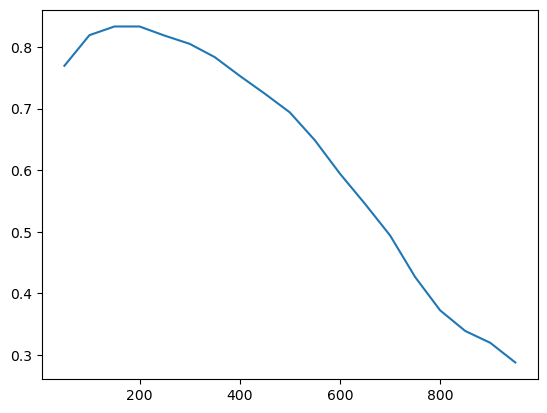

In [66]:
mask = (grid.cv_results_['param_svc__C'].data == 1) & (grid.cv_results_['param_svc__gamma'].data == 0.001)
plt.plot( grid.cv_results_['param_pca__n_components'].data[mask], grid.cv_results_['mean_test_score'][mask])

As can be seen, the best score is achieved for 100 features:

In [67]:
grid.best_params_, grid.best_score_

({'pca__n_components': np.int64(100), 'svc__C': 5, 'svc__gamma': 0.005},
 np.float64(0.8590527330304282))

Finally, let us fit the best model found by the grid search:

In [68]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
(Xtrain.shape,Xtest.shape)

((1011, 2914), (337, 2914))

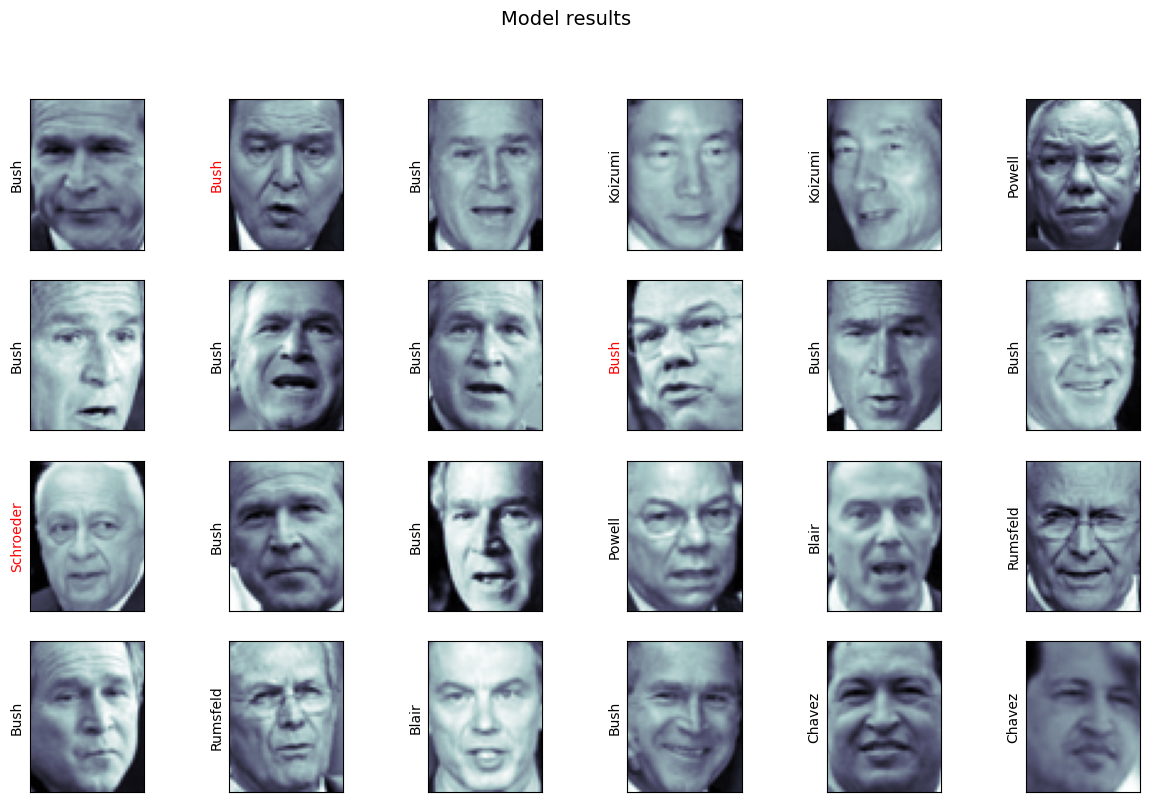

In [69]:
model = grid.best_estimator_
model.fit( Xtrain, ytrain )
yfit = model.predict( Xtest )

fig, ax = plt.subplots(4, 6, figsize=(15,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Model results', size=14);

As can be seen, the model works quite well. We can print a "classification report" that shows which faces are the more difficult to recognize:

In [70]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.73      0.71        15
     Colin Powell       0.86      0.91      0.89        68
  Donald Rumsfeld       0.69      0.71      0.70        31
    George W Bush       0.90      0.90      0.90       126
Gerhard Schroeder       0.90      0.78      0.84        23
      Hugo Chavez       0.94      0.75      0.83        20
Junichiro Koizumi       1.00      1.00      1.00        12
       Tony Blair       0.84      0.88      0.86        42

         accuracy                           0.86       337
        macro avg       0.85      0.83      0.84       337
     weighted avg       0.86      0.86      0.86       337



And the confusion matrix:

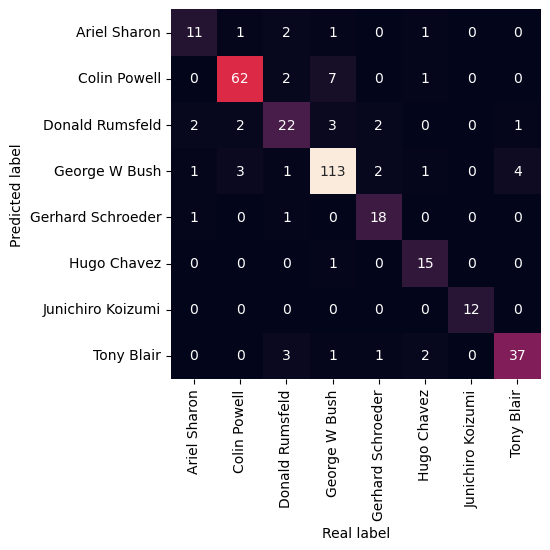

In [71]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Real label')
plt.ylabel('Predicted label');

## Example: Color compression using K-Means

One interesting application of clustering methods is color compression in image files. In most image files many pixels have similar colors. Let us consider the following image:

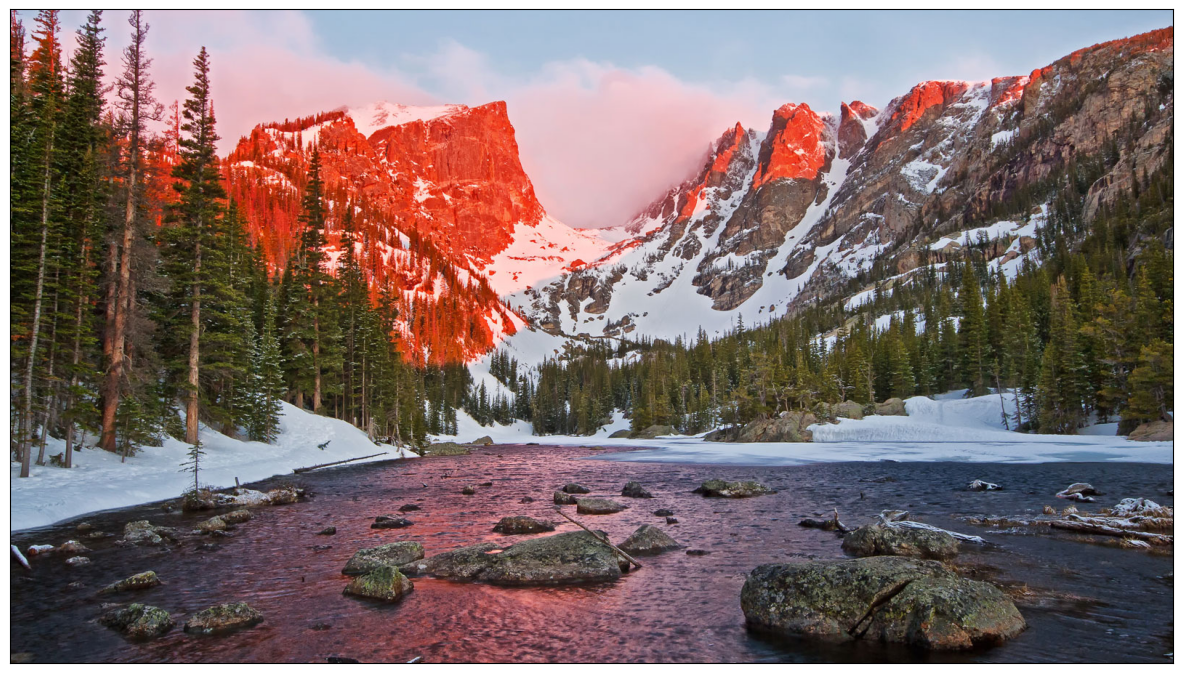

In [72]:
import matplotlib.pyplot as plt

rocky = plt.imread("Files-11/RockyMountains.jpg")
plt.figure(figsize=(15,10))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(rocky)

The image is stored as a 3-dimensional array of shape ``(height, width, RGB)``, storing the contribution of the red, green and blue channels as 8-bit integers:

In [73]:
rocky.shape

(900, 1600, 3)

We can visualize this set of pixels as a cloud of points in the (3-dimensional) RGB space. Let us reshape the image to make it an acceptable 2-dimensional feature matrix, and rescale data so that colors are in the [0,1] range:

In [74]:
data = rocky / 255.0
data = data.reshape( 900*1600, 3 )
data.shape

(1440000, 3)

We can visualize these pixels in the color space (we only show a random sample of 10 000 pixels to save computations):

In [75]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

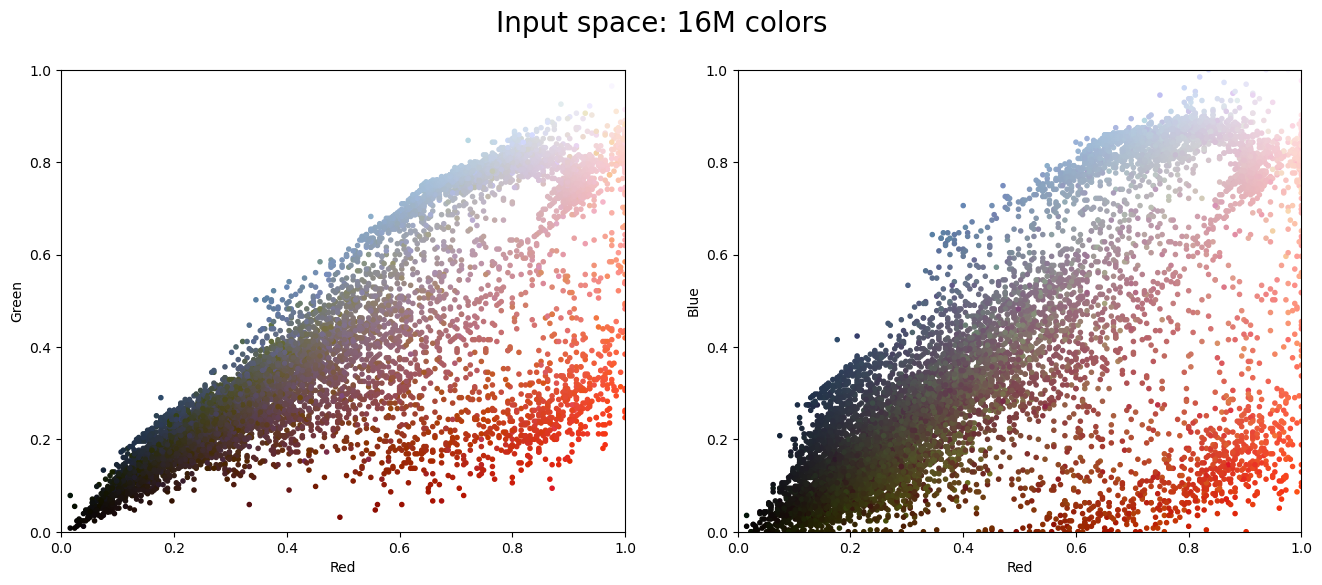

In [76]:
plot_pixels(data, title='Input space: 16M colors')

Let us reduce those 16 million colors to only 16 using k-means. Since the dataset is quite large, we will use the ``MiniBatchKMeans`` class, which operates on isolated subsets of the data to improve performance:

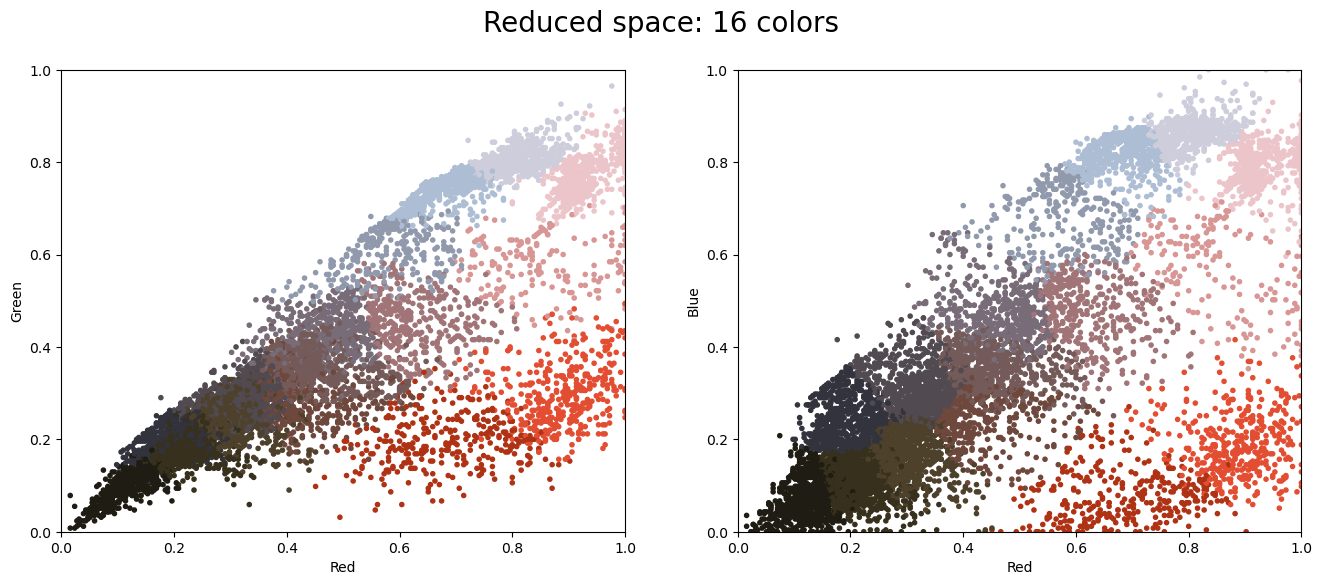

In [77]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced space: 16 colors")

The output is the original image, but recolored using 16 colors only, where each pixel has been assigned the centroid of its corresponding cluster. We can visualize the resulting image:

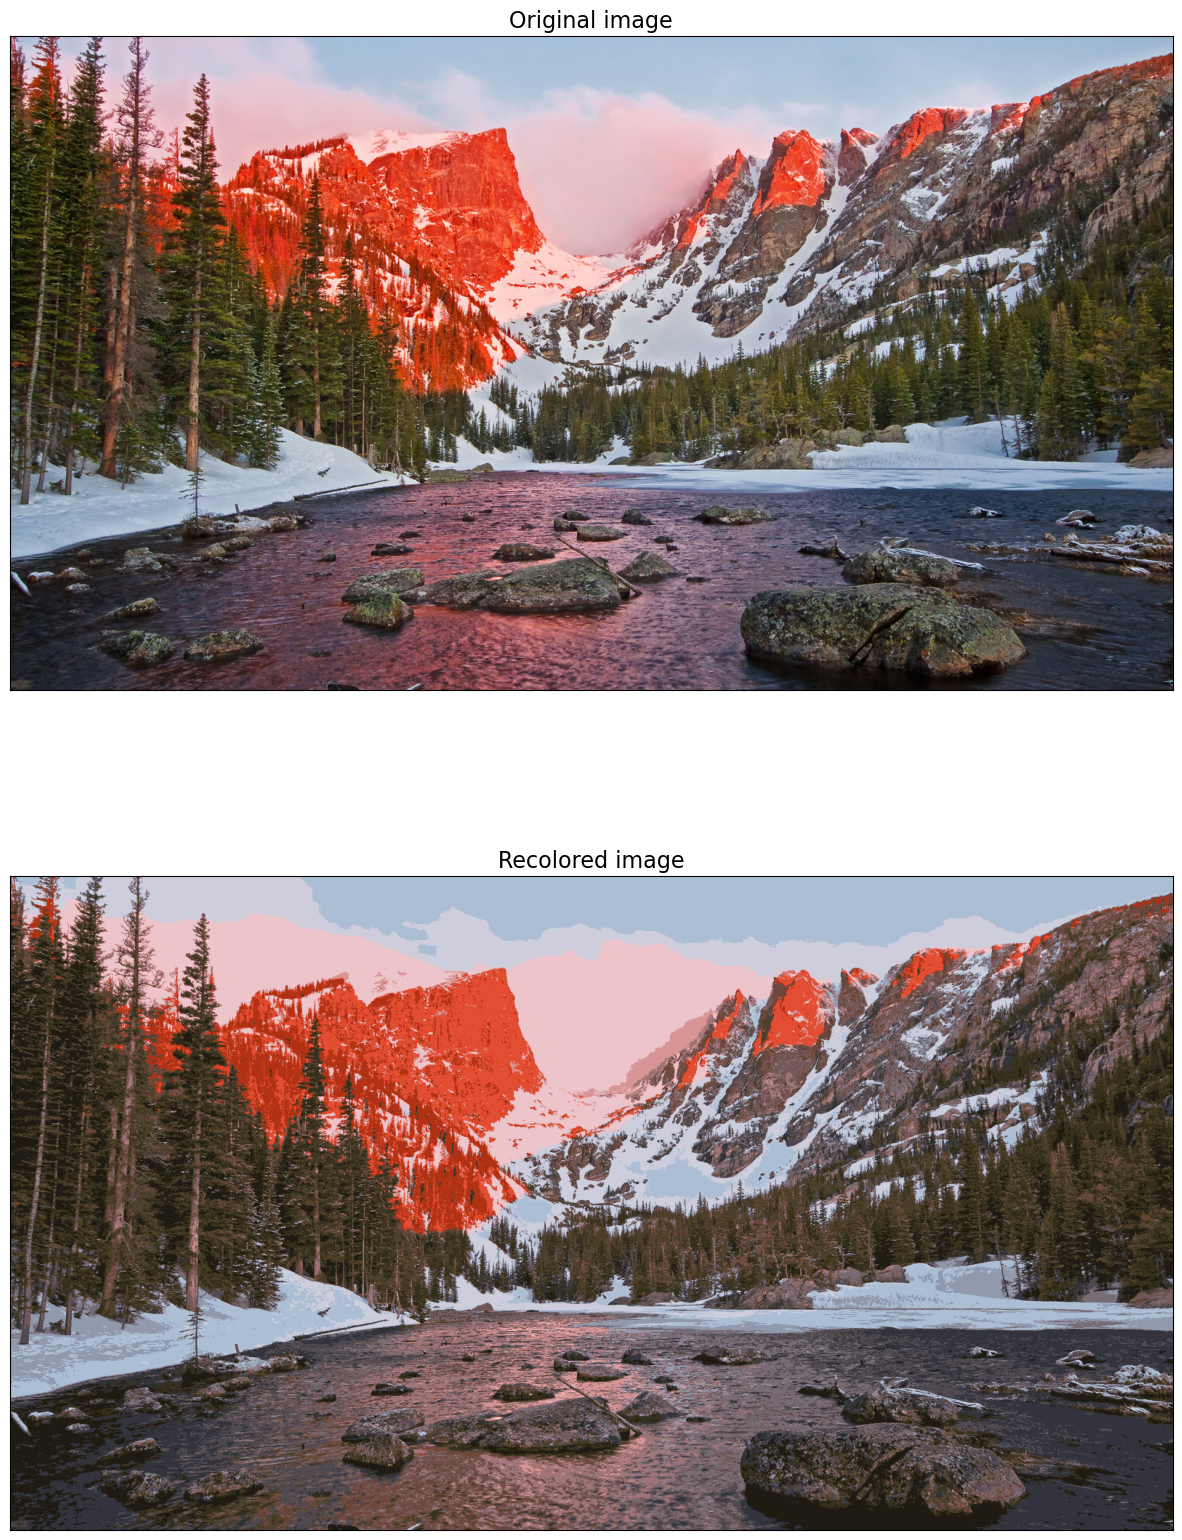

In [78]:
rocky_recolored = new_colors.reshape(rocky.shape)

fig, ax = plt.subplots(2, 1, figsize=(15,20),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(rocky)
ax[0].set_title('Original image', size=16)
ax[1].imshow(rocky_recolored)
ax[1].set_title('Recolored image', size=16);